# 本周内容的概括：
 - 不受监督的学习
 - 聚类算法
   - k-Means Cluster
   - Hierarchical Cluster
   - Gaussian Mixture Models

# 1. 概念
> 什么时候用无监督学习? 数据没有label的时候。
> > 例子：
> > - 文件分类
> > - 异常点检测
> > - 客户画像
> > - 推荐算法 
>

> 聚类（Clustering）算法
>
>  - 目标：把无标签数据分成若干个cluster
>  - 也是基于数据点之间的距离
>  - 挑战:
>     - Cluster数量问题
>    - 算法的稳定性和收敛性问题


> 数据点之间的距离问题
>  - 两种距离的示范：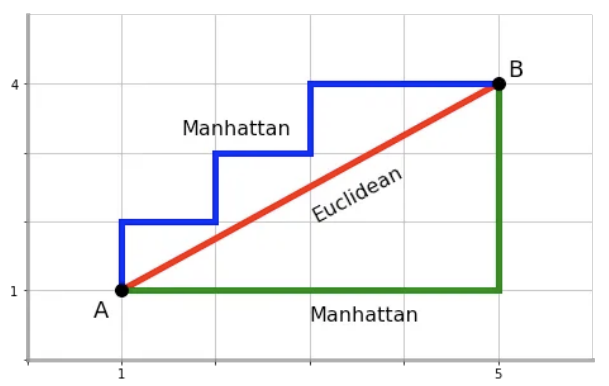
>  - 欧氏距离就是`np.linalg.norm(x-y)`就可以了
>  - 曼哈顿距离就是各个feature维度的差的绝对值的$\sum$
>  - 汉明（hamming）距离：
>       - 如果你的数据不是各个轴上的一堆数据，而是各种玩意儿的时候，可能会很有用。
>       - 两个串之间有几处不同就是几


# 2. K-Means Clustering

> 流程：
> > 1. 把数据随机分成`k`个集合
> > 2. 算出每个集合的质心
> > 3. 用新质心重新标注数据label
> > 4. 没有更新了就结束，不然返回2. 

> 怎么算质心：
> > 所有数据点求平均。

> 怎么衡量聚类的效果？
> > 用不相似度（degree of dissimilarity）来衡量  
> > 
> > $\sum\limits^{所有类} \sum\limits^{类内的所有数据点} 数据点与质心的距离 $
>
> 实际上就是某种质心计算，kmeans的意图是最小化这个值

> 缺点：
>  - 假设所有的类都是圆的且大小相等
>  - 类的数目K是手动设置的
>  - 存在局部极小值问题
>  - 例子如下：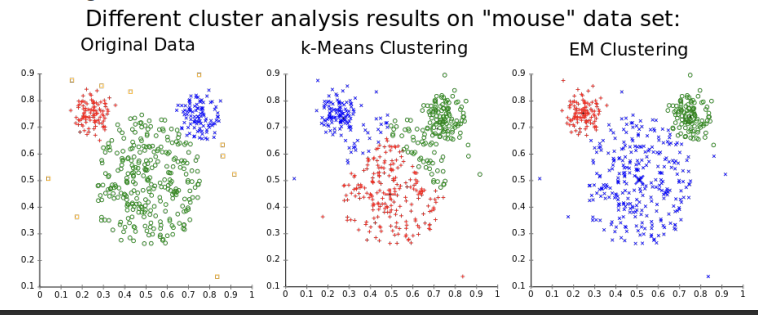

> 总结：
>  - 简单又直观
>  - 通过最小化类内差距来运作
>  - 有若干缺陷：如上述
 

# 3. Hierarchical Clustering 分层聚类

> 分类：
>  - 自底向上：把所有数据点包含在一类内，再拆这一类
>  - 自顶向下：把数据点划归到一起来创造类

> Hierarchical K-means：
>  - 自顶向下
>  - 对于一个给定的K值，递归地对所有cluster应用K-means，直到每类只剩一个点为止
>  - 如图： 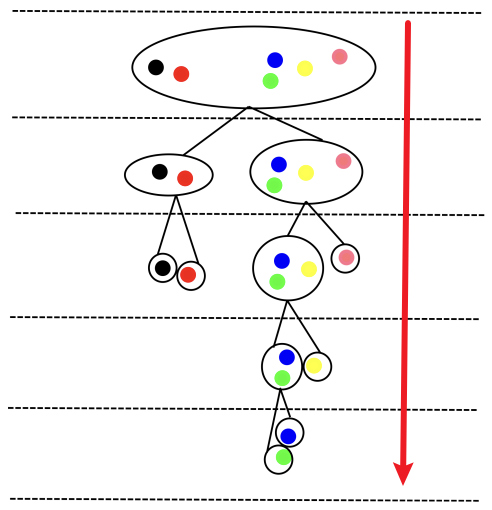

> Agglomerative clustering：
>  - 自底向上
>  - 把相近的点聚到一类里。
>  - 需要衡量类之间距离的方法 
>       - 四种方法
>       - 最大距离，最小距离，平均距离，质心距离
>       - 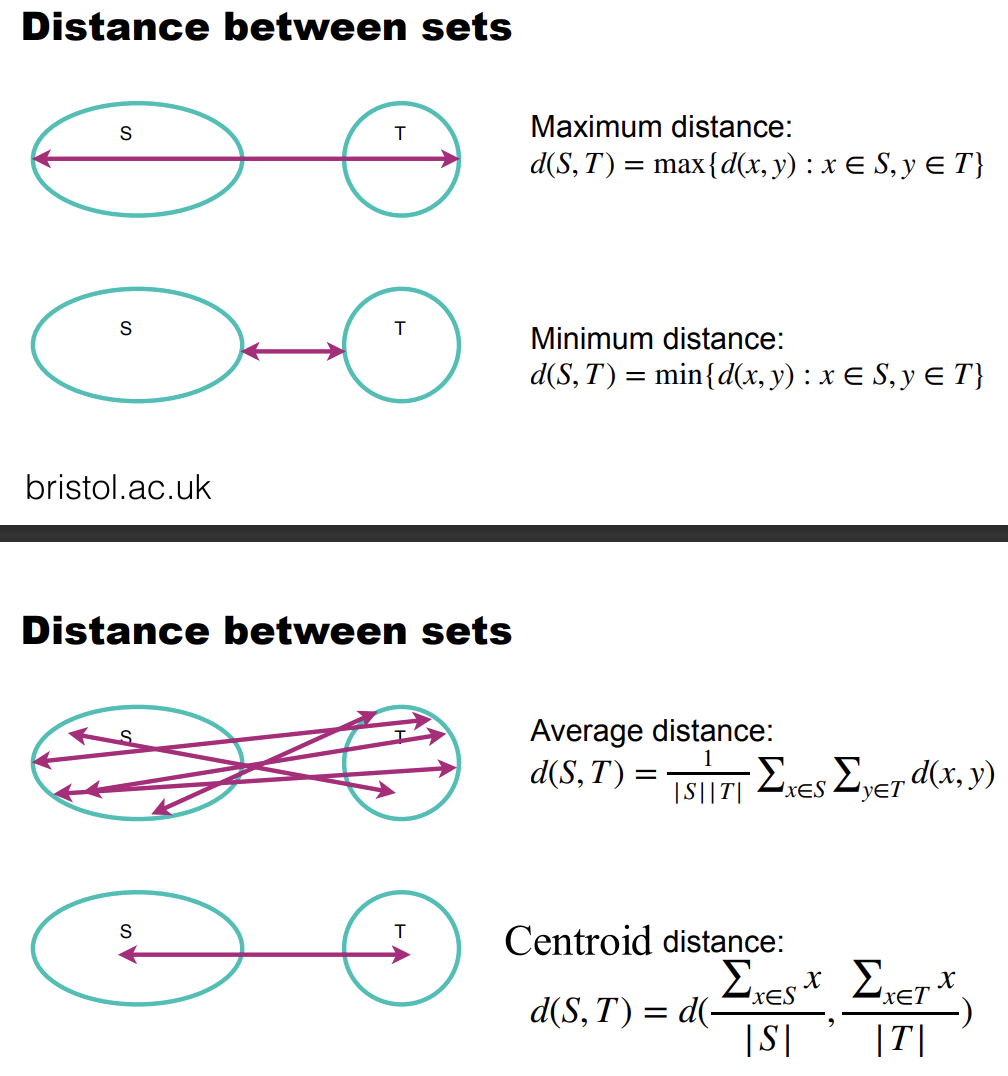
>  - 具体算法：将所有点两两划归一组，递归
>  - 其输出用树形图表示，y轴代表其类之间的相似度
>       - 只要找到类间相似度变化最大的地方切割，就能获得自然分类，如下图：
>       - 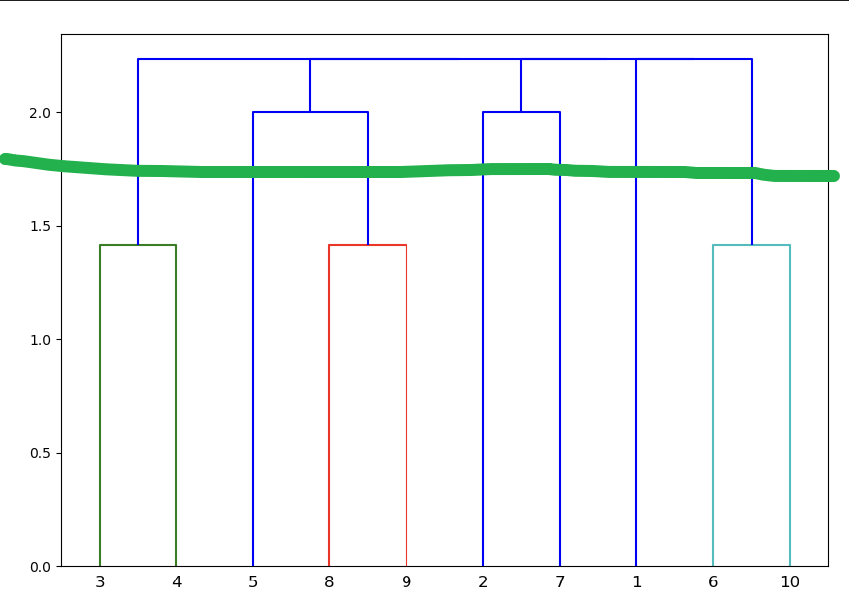

Hierarchical Clustering总结：
> - Hierarchical 聚类可以给你一系列类，可以选用不同层级的分类
> - 可以是自顶向下的，可以是分层（divisively）的，可以是自底向上的
> - 其结果可以用树形图可视化
> - 树形图展示了聚类的顺序和列之间的距离，自然分类就是类间距离最大的地方切开树形图得到的


# 4. Gaussian Mixture Models

> 将若干个高斯正态分布（就是高斯naive bayes分布）混合来获得一个统一模型
>
> 单个分布的式子：
> $
\begin{equation}
N(\vec{x}|\vec{\mu},\sum) = \frac{1}{(2\pi)^\frac{n}{2}det(\sum)^\frac{1}{2}}e^{-\frac{1}{2}(\vec{x}-\vec{\mu})^T\sum^{-1}(\vec{x}-\vec{\mu})}
\end{equation}
$
> 
>  - x: 数据点的feature向量
>  - $\mu$:所有数据点的均值向量
>  - $\sum$: 各个feature的协方差矩阵，表示beature之间变化的相互影响
> 
> 这个分布在numpy里有一整个打包好的功能
>
> 将多个高斯正态分布结合来生成混合分布：
> $
\begin{equation}
 p(\vec{x}) = \sum\limits^{K}_{k=1} \pi_{k}N ( \vec{x} | \vec{\mu_k},\sum_k) 
\end{equation}
$
> - 对于$k$个clusters，每个cluster是一个正态分布$N$，各有一个$\mu$一个$\sum$
> - 每个$N$有一个自己的可能性参数$\pi_k$，其须为正，所有$\pi_k$的和为1
>
> 判断数据点对集合的归属度：责任值。详见Week15PDF P35/38

> 算法流程：
> 1. 初始化均值$\mu_k$，协方差$\sum_k$，混合系数$\pi_k$
> 2. 计算责任值，用责任值所代表的归属度重新划分集合成员
> 3. 重算集合
> 4. 迭代  
> 如图：  
> 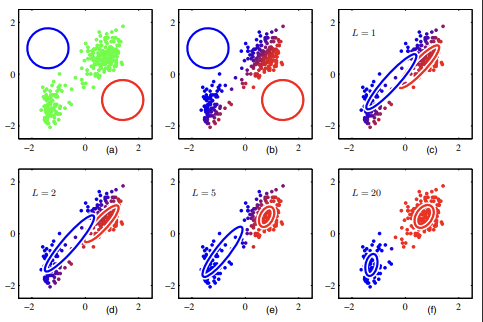

Gaussian Mixture Model 总结：
> - 可以用一种概率的方式聚类
> - 用多变量的高斯分布的加权和来代表数据
> - 模型参数是迭代学出来的。也算一种期望最大化算法吧。

# 5. 作业

## 5.1 K-Means 聚类

`from sklearn.cluster import KMeans`

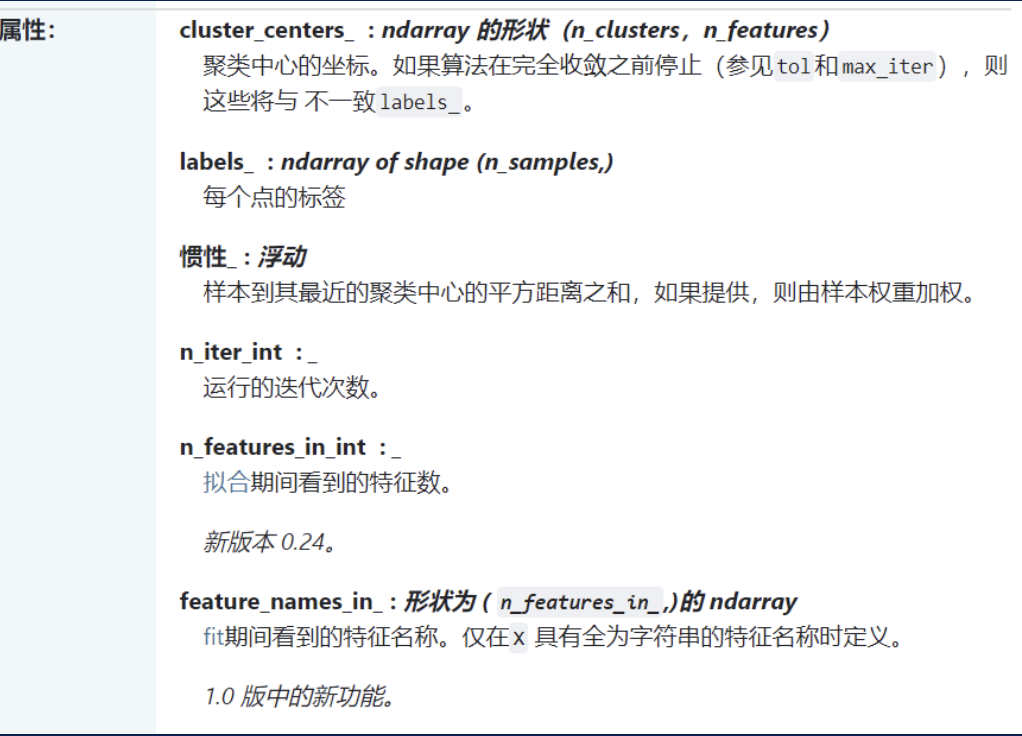

In [8]:
# 环境设置

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
# 生成测试数据
from sklearn import datasets

# 生成数据集
# 数据个数，特征空间维数，数据点云中心数
X, _ = datasets.make_blobs(n_samples=50, n_features=3, centers=5)

In [10]:
# 调库
from sklearn.cluster import KMeans

In [19]:
# 算
kmeans = KMeans(n_clusters=4) # k=4 4个类
kmeans.fit(X)

print("Inertia(越小越好):"+str(kmeans.inertia_))
print("质心们：\n"+str(kmeans.cluster_centers_))

# 土法的类惯量计算参考Week15的labsheet
# Inertia越小说明类内成员离质心越紧密吧大概

Inertia(越小越好):266.283569970093
质心们：
[[-5.75782654 -3.7470997  -9.46584782]
 [ 8.16496956  1.202309   -6.80813071]
 [-5.13821309  6.53774501 -6.90256936]
 [ 6.94570624 -3.26152909 -0.55109117]]


a:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
a:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 5.2 Hierarchical Clustering

In [20]:
# 调库
from scipy.cluster.hierarchy import dendrogram, linkage

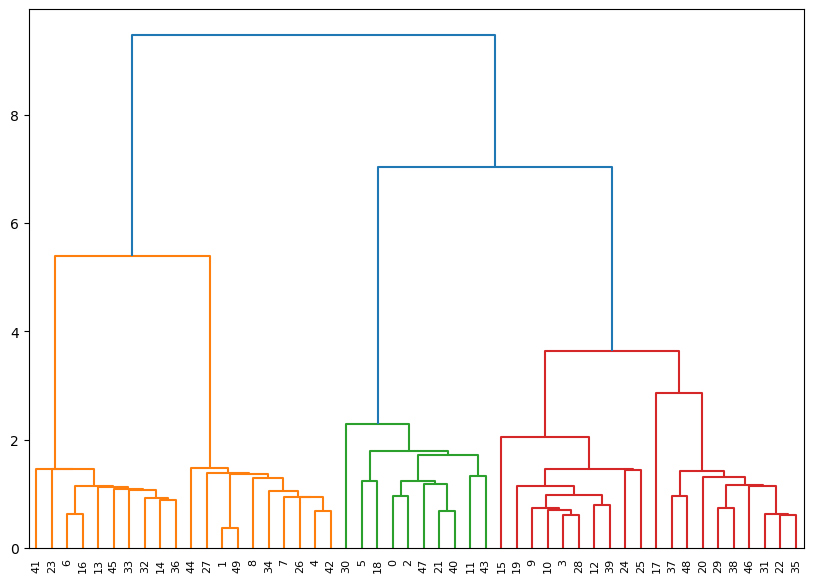

In [22]:
# 算
linked = linkage(X,"single") # single的意思是从四种计算类间距离的方法中挑选最小距离
labellist = range((len(X)))
plt.figure(figsize=(10,7))
dendrogram(linked,labels=labellist)
plt.show()

> `single`：最小距离
> 
> `average`：平均距离
> 
> `complete`：最大距离
> 
> `centroid`：质心距离

## 5.3 Gaussian Mixture Models


In [23]:
# 调库
from sklearn.mixture import GaussianMixture as GMM

In [28]:
# 算
gmm = GMM(n_components=3)
gmm.fit(X)

# 提取算出来的数据：
print(str(gmm.means_)+"\n")
print(gmm.covariances_)

[[-5.13821309  6.53774501 -6.90256936]
 [ 7.5553379  -1.02961005 -3.67961094]
 [-5.75782654 -3.7470997  -9.46584782]]

[[[ 5.50889665 -1.83524083  2.6746148 ]
  [-1.83524083  1.58914254 -1.47718115]
  [ 2.6746148  -1.47718115  2.7504825 ]]

 [[ 1.05393687  1.26276994 -1.95919571]
  [ 1.26276994  5.60513838 -7.12625052]
  [-1.95919571 -7.12625052 10.28674081]]

 [[ 0.60133603  0.38272252  0.03961116]
  [ 0.38272252  1.1954978   0.13237588]
  [ 0.03961116  0.13237588  1.52436128]]]


a:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
# 比较一下KMeans和GMM的质心区别：

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)

# 差不多

[[-5.13821309  6.53774501 -6.90256936]
 [ 7.5553379  -1.02961005 -3.67961094]
 [-5.75782654 -3.7470997  -9.46584782]]


a:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
a:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
# GMM各个集合出现的概率：
print(gmm.weights_)

# 我觉得这个概率反映了各个集合之间成员的多寡比例

[0.4 0.4 0.2]
